Lung Cancer Research Project

In this project we are looking at a study of patients with lung cancer, and trying to determine what risk factors played into their level of cancer. We wanted to look at different subgroups (Age and Gender) to determine how different groups of people's factors were at play. 
Some quetions we wanted to answer:
1. **How do the risk factors differ for different age groups of patients?**
    The older group of patients averaged higher levels of risk factors than younger and middle aged groups. 
2. **How do the risk factors differ for male vs female patients?**
    Men tended to have higher risk factors than women. 
3. **What is the relation of pollution to the level of cancer in patients?**
    Patients who reported higher levels of air pollution tended to have higher levels of cancer. The correlation between air pollution and level of cancer was closer to 1 than not, so there is a positive correlation between the two, but the p-value indicated that this data was not satistically significant. 
4. **What is the relation of smoking habits to the level of cancer in patients?**
    Patients who smoked more had higher levels of cancer on average. The correlation between smoking and level of cancer was closer to 1, so there is a postive correlation between the two, but the p-value indicated that this data was not satistically significant. 

In conclusion, older men had the highest level of risk factors. Air pollution and smoking had a positive with higher levels of lung cancer. 


Cleaning and data setup

In [144]:
#import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import hvplot.pandas
from scipy.stats import pointbiserialr

# Import the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [170]:
#set file path
cancer_data_path = "../Resources/cancer patient data sets.csv"
#read the file path
cancer_data = pd.read_csv(cancer_data_path)
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [21]:
#check that the data is clean - check for duplicate values in Patient ID
cancer_data["Patient Id"].nunique()

1000

In [22]:
#cleaning data - checking that all columns are filled out
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [190]:
#cleaning data - create new data frame that removes excess columnns
clean_cancer = cancer_data[["Patient Id", "Age", "Gender", "Air Pollution", "Alcohol use", "Genetic Risk", "Obesity", "Smoking", "Passive Smoker", "Level"]]
clean_cancer = clean_cancer.copy()
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,1,2,4,3,4,3,2,Low
1,P10,17,1,3,1,4,2,2,4,Medium
2,P100,35,1,4,5,5,7,2,3,High
3,P1000,37,1,7,7,6,7,7,7,High
4,P101,46,1,6,8,7,7,8,7,High


In [180]:
#cleaning data - replace "1" in Gender to Male and "2" to Female
clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"
clean_cancer.loc[clean_cancer["Gender"] == 2, "Gender"] = "Female"
clean_cancer.head()

/var/folders/5k/_yxk9n810sqfyd87_kzfpfbm0000gn/T/ipykernel_77390/1564231274.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,Male,2,4,3,4,3,2,Low
1,P10,17,Male,3,1,4,2,2,4,Medium
2,P100,35,Male,4,5,5,7,2,3,High
3,P1000,37,Male,7,7,6,7,7,7,High
4,P101,46,Male,6,8,7,7,8,7,High


Entire Dataset Analysis

In [26]:
#Look at level of cancer across the sample of patients
levels_labels = clean_cancer["Level"].value_counts()
levels_labels

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

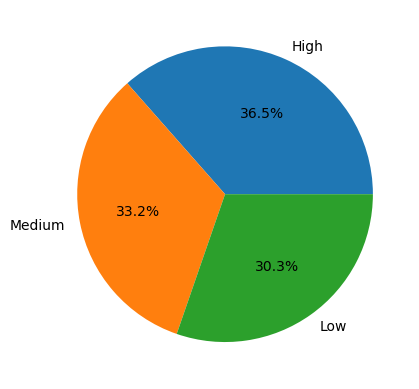

In [27]:
#create a pie chart showing the level of cancer across patients
plt.pie(levels_labels, labels=levels_labels.index,
        autopct="%1.1f%%")
plt.show()

What is the relation of air pollution to levels of cancer?

In [28]:
#find the average air pollution level
print(f"The overall average of air pollution is {clean_cancer['Air Pollution'].mean()}")
low_level = clean_cancer.loc[clean_cancer["Level"]== "Low"]
medium_level = clean_cancer.loc[clean_cancer["Level"]== "Medium"]
high_level = clean_cancer.loc[clean_cancer["Level"] == "High"]
print(f"The average of air pollution for those with low-level cancer is {low_level['Air Pollution'].mean()}")
print(f"The average of air pollution for those with medium-level cancer is {medium_level['Air Pollution'].mean()}")
print(f"The average of air pollution for those with high-level cancer is {high_level['Air Pollution'].mean()}")

The overall average of air pollution is 3.84
The average of air pollution for those with low-level cancer is 2.6006600660066006
The average of air pollution for those with medium-level cancer is 2.933734939759036
The average of air pollution for those with high-level cancer is 5.693150684931507


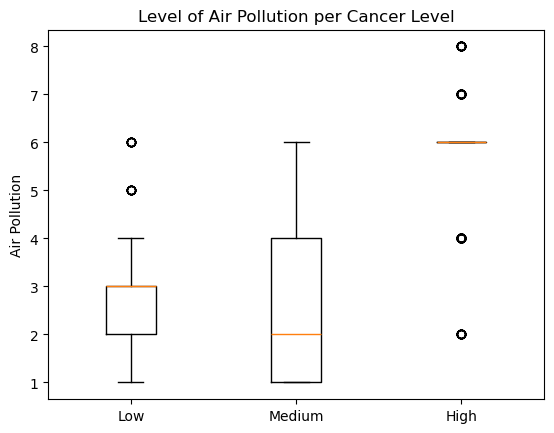

In [29]:
#create a box plot showing level of air pollution to level of cancer
levels = ["Low", "Medium", "High"]
air_pollution = []

for level in levels:
    pollution_value = clean_cancer.loc[clean_cancer["Level"] == level,"Air Pollution"]
    air_pollution.append(pollution_value)
    quartiles = pollution_value.quantile([0.25,0.5,0.75])

plt.ylabel("Air Pollution")
plt.boxplot(air_pollution, labels=levels)
plt.title("Level of Air Pollution per Cancer Level")
plt.show()


In [191]:
#find the correlation between air pollution and level of cancer
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
clean_cancer['Level'] = clean_cancer['Level'].map(level_mapping)

# Calculate correlation coefficient
correlation_coefficient, p_value = pointbiserialr(clean_cancer['Air Pollution'], clean_cancer['Level'])

print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.6360384924565836
p-value: 1.769224974180674e-114


In [192]:
#create a mapped data frame for future stasitics 
cancer_mapping = clean_cancer.copy()

In [194]:
#remove mapping
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}

# Apply level mapping to 'Level' column
clean_cancer['Level'] = clean_cancer['Level'].replace({1: 'Low', 2: 'Medium', 3: 'High'})

In [195]:
#check that removing mapping worked
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,1,2,4,3,4,3,2,Low
1,P10,17,1,3,1,4,2,2,4,Medium
2,P100,35,1,4,5,5,7,2,3,High
3,P1000,37,1,7,7,6,7,7,7,High
4,P101,46,1,6,8,7,7,8,7,High


API: look at the 30 most populated cities in the world and see what their current air pollution level is

In [30]:
cities = ["Tokyo", "New York City", "Los Angeles", "Delhi", "Shanghai", "Sao Paulo", "Mexico City", "Cairo", "Mumbai", "Beijing", "Dhaka", "Osaka",
          "Karachi", "Buenos Aires", "Chongqing", "Istanbul", "Kolkata", "Manila", "Lagos", "Rio de Janeiro", "Tianjin", "Kinshasa", "Guangzhou", "Moscow",
          "Shenzhen", "Lahore", "Bangalore", "Paris", "Bogotá", "Jakarta"]

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

# Define an empty list to fetch the lat and lng for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng,})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Tokyo
Processing Record 2 of Set 1 | New York City
Processing Record 3 of Set 1 | Los Angeles
Processing Record 4 of Set 1 | Delhi
Processing Record 5 of Set 1 | Shanghai
Processing Record 6 of Set 1 | Sao Paulo
Processing Record 7 of Set 1 | Mexico City
Processing Record 8 of Set 1 | Cairo
Processing Record 9 of Set 1 | Mumbai
Processing Record 10 of Set 1 | Beijing
Processing Record 11 of Set 1 | Dhaka
Processing Record 12 of Set 1 | Osaka
Processing Record 13 of Set 1 | Karachi
Processing Record 14 of Set 1 | Buenos Aires
Processing Record 15 of Set 1 | Chongqing
Processing Record 16 of Set 1 | Istanbul
Processing Record 17 of Set 1 | Kolkata
Processing Record 18 of Set 1 | Manila
Processing Record 19 of Set 1 | Lagos
Processing Record 20 of Set 1 | Rio de Janeiro
Processing Record 21 of Set 1 | Tianjin
Processing Record 22 of Set 1 | Kinshasa
Processing Record 23 of Set 1 | Guangzhou
Processi

In [31]:
#create a data frame
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng
0,Tokyo,35.6895,139.6917
1,New York City,40.7143,-74.0060
2,Los Angeles,34.0522,-118.2437
3,Delhi,28.6667,77.2167
4,Shanghai,31.2222,121.4581
5,Sao Paulo,-23.5475,-46.6361
6,Mexico City,19.4285,-99.1277
7,Cairo,30.0626,31.2497
8,Mumbai,19.0144,72.8479
9,Beijing,39.9075,116.3972


In [32]:
query_url = "http://api.openweathermap.org/data/2.5/air_pollution?"
pollution_data = []
# Iterate through the DataFrame
for index, row in city_df.iterrows():
    lat = row['Lat']
    lon = row['Lng']
    
    # Create the API URL
    api_call_url = f"{query_url}lat={lat}&lon={lon}&appid={weather_api_key}"
    
    pollution = requests.get(api_call_url).json()

     # Parse out the different air quality values
    city_co = pollution["list"][0]["components"]["co"]
    city_no = pollution["list"][0]["components"]["no"]
    city_no2 = pollution["list"][0]["components"]["no2"]
    city_o3 = pollution["list"][0]["components"]["o3"]
    city_so2 = pollution["list"][0]["components"]["so2"]
    city_pm2_5 = pollution["list"][0]["components"]["pm2_5"]
    city_pm10 = pollution["list"][0]["components"]["pm10"]
    city_nh3 =  pollution["list"][0]["components"]["nh3"]

    # Add the data to the pollution_data list
    pollution_data.append({"Lat": lat,
                      "Lng": lon,
                        "CO": city_co, 
                          "NO": city_no, 
                          "NO2": city_no2,
                          "O3": city_o3,
                          "SO2": city_so2,
                          "PM2_5": city_pm2_5,
                          "PM10": city_pm10,
                          "NH3": city_nh3})

In [33]:
#create a data frame
pollution_df = pd.DataFrame(pollution_data)
pollution_df

,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,35.6895,139.6917,547.41,49.17,77.46,0.00,31.95,35.46,42.02,9.37
1,40.7143,-74.0060,390.53,3.44,30.85,37.19,2.30,4.24,7.21,1.58
2,34.0522,-118.2437,660.90,9.61,63.06,160.22,27.18,89.23,106.59,0.21
3,28.6667,77.2167,1655.58,0.19,35.99,14.48,15.02,374.90,426.09,8.23
4,31.2222,121.4581,5767.82,289.68,98.71,0.00,469.21,281.62,330.39,0.19
5,-23.5475,-46.6361,1041.41,29.06,47.30,0.39,12.76,20.03,36.79,5.45
6,19.4285,-99.1277,594.14,0.51,6.34,211.72,30.52,33.32,37.37,0.71
7,30.0626,31.2497,257.02,0.00,15.08,57.22,15.74,8.62,15.64,11.78
8,19.0144,72.8479,734.33,0.00,18.68,70.81,23.84,127.81,145.96,6.21
9,39.9075,116.3972,2243.04,123.38,89.11,0.00,113.49,240.15,330.02,121.59


In [34]:
#merge the data frame with the city with the pollution data frame
updated_city_pollution = pd.merge(city_df, pollution_df, on=["Lat", "Lng"])
updated_city_pollution

,City,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,Tokyo,35.6895,139.6917,547.41,49.17,77.46,0.00,31.95,35.46,42.02,9.37
1,New York City,40.7143,-74.0060,390.53,3.44,30.85,37.19,2.30,4.24,7.21,1.58
2,Los Angeles,34.0522,-118.2437,660.90,9.61,63.06,160.22,27.18,89.23,106.59,0.21
3,Delhi,28.6667,77.2167,1655.58,0.19,35.99,14.48,15.02,374.90,426.09,8.23
4,Shanghai,31.2222,121.4581,5767.82,289.68,98.71,0.00,469.21,281.62,330.39,0.19
5,Sao Paulo,-23.5475,-46.6361,1041.41,29.06,47.30,0.39,12.76,20.03,36.79,5.45
6,Mexico City,19.4285,-99.1277,594.14,0.51,6.34,211.72,30.52,33.32,37.37,0.71
7,Cairo,30.0626,31.2497,257.02,0.00,15.08,57.22,15.74,8.62,15.64,11.78
8,Mumbai,19.0144,72.8479,734.33,0.00,18.68,70.81,23.84,127.81,145.96,6.21
9,Beijing,39.9075,116.3972,2243.04,123.38,89.11,0.00,113.49,240.15,330.02,121.59


In [35]:
#create bins to show how the air quality is currently
co_bins = [0, 4400, 9400, 12400, 15400, 50000]
no2_bins = [0, 40, 70, 150, 200, 1000]
o3_bins = [0, 60, 100, 140, 180, 1000]
so2_bins = [0, 20, 80, 250, 350, 1000]
pm2_5_bins = [0, 10, 25, 50, 75, 500]
pm10_bins = [0, 20, 50, 100, 200, 1000]
labels = ["Good", "Fair", "Moderate", "Poor", "Very Poor"]
updated_city_pollution["CO Air Condition"] = pd.cut(updated_city_pollution["CO"], co_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["NO2 Air Condition"] = pd.cut(updated_city_pollution["NO2"], no2_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["O3 Air Condition"] = pd.cut(updated_city_pollution["O3"], o3_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["SO2 Air Condition"] = pd.cut(updated_city_pollution["SO2"], so2_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["PM2_5 Air Condition"] = pd.cut(updated_city_pollution["PM2_5"], pm2_5_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution["PM10 Air Condition"] = pd.cut(updated_city_pollution["PM10"], pm10_bins, 
                                        labels=labels, include_lowest=True)
updated_city_pollution

,City,Lat,Lng,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,CO Air Condition,NO2 Air Condition,O3 Air Condition,SO2 Air Condition,PM2_5 Air Condition,PM10 Air Condition
0,Tokyo,35.6895,139.6917,547.41,49.17,77.46,0.00,31.95,35.46,42.02,9.37,Good,Moderate,Good,Fair,Moderate,Fair
1,New York City,40.7143,-74.0060,390.53,3.44,30.85,37.19,2.30,4.24,7.21,1.58,Good,Good,Good,Good,Good,Good
2,Los Angeles,34.0522,-118.2437,660.90,9.61,63.06,160.22,27.18,89.23,106.59,0.21,Good,Fair,Poor,Fair,Very Poor,Poor
3,Delhi,28.6667,77.2167,1655.58,0.19,35.99,14.48,15.02,374.90,426.09,8.23,Good,Good,Good,Good,Very Poor,Very Poor
4,Shanghai,31.2222,121.4581,5767.82,289.68,98.71,0.00,469.21,281.62,330.39,0.19,Fair,Moderate,Good,Very Poor,Very Poor,Very Poor
5,Sao Paulo,-23.5475,-46.6361,1041.41,29.06,47.30,0.39,12.76,20.03,36.79,5.45,Good,Fair,Good,Good,Fair,Fair
6,Mexico City,19.4285,-99.1277,594.14,0.51,6.34,211.72,30.52,33.32,37.37,0.71,Good,Good,Very Poor,Fair,Moderate,Fair
7,Cairo,30.0626,31.2497,257.02,0.00,15.08,57.22,15.74,8.62,15.64,11.78,Good,Good,Good,Good,Good,Good
8,Mumbai,19.0144,72.8479,734.33,0.00,18.68,70.81,23.84,127.81,145.96,6.21,Good,Good,Fair,Fair,Very Poor,Poor
9,Beijing,39.9075,116.3972,2243.04,123.38,89.11,0.00,113.49,240.15,330.02,121.59,Good,Moderate,Good,Moderate,Very Poor,Very Poor


In [36]:
# Configure the map plot
air_map = updated_city_pollution.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "PM2_5",
    color = "City")

# Display the map
air_map

/Users/sam/anaconda3/envs/dev/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,PM2_5)

Smoking in relation to levels of cancer

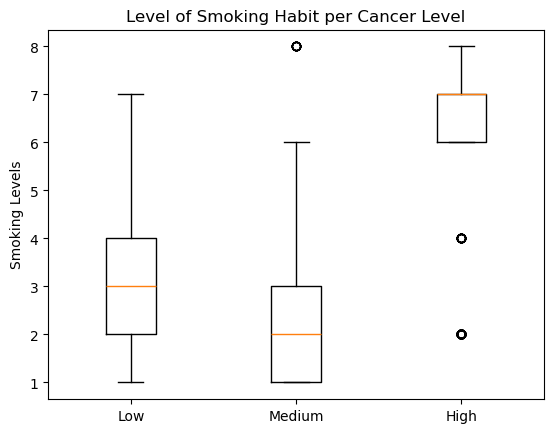

In [14]:
levels = ["Low", "Medium", "High"]
smoking = []

for level in levels:
    smoking_value = clean_cancer.loc[clean_cancer["Level"] == level,"Smoking"]
    smoking.append(smoking_value)
    quartiles = smoking_value.quantile([0.25,0.5,0.75])

plt.ylabel("Smoking Levels")
plt.boxplot(smoking, labels=levels)
plt.title("Level of Smoking Habit per Cancer Level")
plt.show()


In [198]:
# Calculate correlation coefficient
correlation_coefficient, p_value = pointbiserialr(cancer_mapping["Smoking"], cancer_mapping["Level"])

print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.5195301454571833
p-value: 3.234784076147837e-70


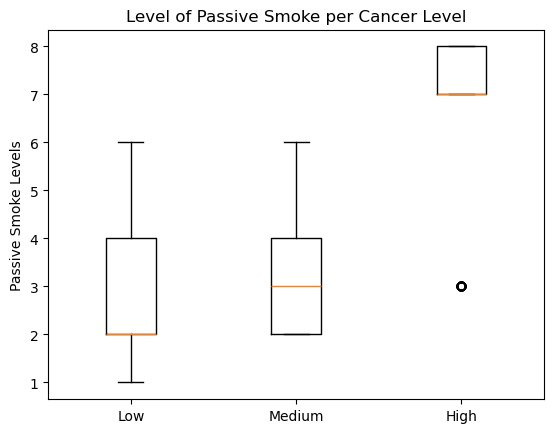

In [37]:
levels = ["Low", "Medium", "High"]
passive_smoking = []

for level in levels:
    p_smoking_value = clean_cancer.loc[clean_cancer["Level"] == level,"Passive Smoker"]
    passive_smoking.append(p_smoking_value)
    quartiles = p_smoking_value.quantile([0.25,0.5,0.75])

plt.ylabel("Passive Smoke Levels")
plt.boxplot(passive_smoking, labels=levels)
plt.title("Level of Passive Smoke per Cancer Level")
plt.show()

In [199]:
# Calculate correlation coefficient
correlation_coefficient, p_value = pointbiserialr(cancer_mapping["Passive Smoker"], cancer_mapping["Level"])

print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation coefficient: 0.7035944161827974
p-value: 3.0029184038056753e-150


Gender and Risk Factors

In [47]:
#prepare data to plot ratio of men to women
gender_counts = clean_cancer["Gender"].value_counts()
gender_counts

Gender
Male      598
Female    402
Name: count, dtype: int64

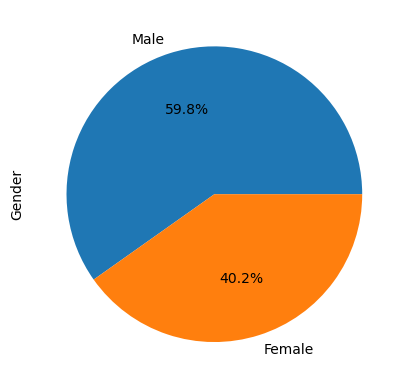

In [48]:
#plot the ratio of men to women in the study
pie_graph = gender_counts.plot(kind="pie", y="Gender", autopct='%1.1f%%')
pie_graph.set_ylabel("Gender")
plt.show()

In [49]:
#create the gender subgroups
male_group = clean_cancer.loc[clean_cancer["Gender"] == "Male"]
female_group = clean_cancer.loc[clean_cancer["Gender"]== "Female"]

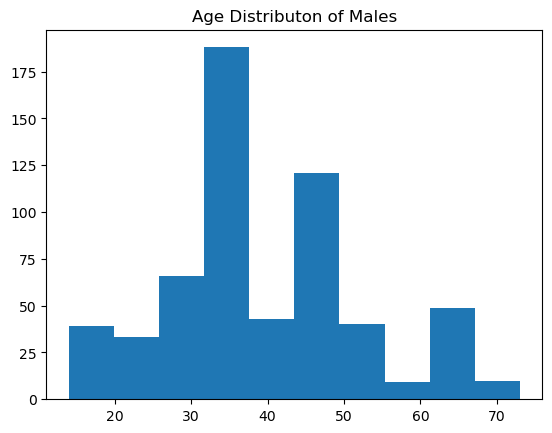

In [50]:
#plot a histogram of the breakdown of the age of the male patients
plt.hist(male_group["Age"])
plt.title("Age Distributon of Males")
plt.show()

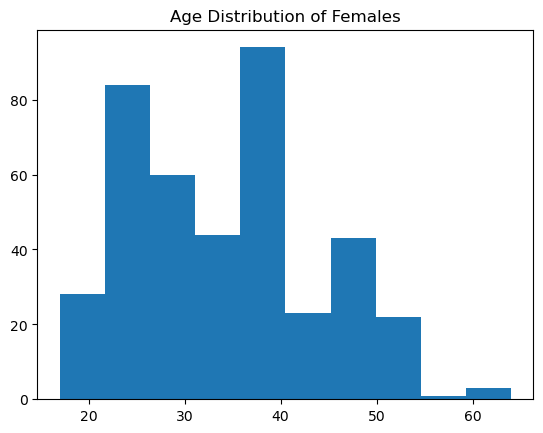

In [51]:
#same for female
plt.hist(female_group["Age"])
plt.title("Age Distribution of Females")
plt.show()

In [39]:
#bin by level of smoking
smoking_bins = [1, 5, 9]
smoking_labels = ["Low Smoking Habit", "High Smoking Habit"]
#use pd.cut to categorize age based on the bins
clean_cancer["Smoking Level"] = pd.cut(clean_cancer["Smoking"], 
                                smoking_bins, labels=smoking_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit


In [40]:
#alcohol use bins
alcohol_bins = [1, 5, 9]
alcohol_labels = ["Low Alcohol Use", "High Alcohol Use"]
clean_cancer["Alcohol Use"] = pd.cut(clean_cancer["Alcohol use"], alcohol_bins, 
                                        labels=alcohol_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use


In [41]:
#genetic risk bins
genetic_bins = [1, 5, 9]
genetic_labels = ["Low Genetic Risk", "High Genetic Risk"]
clean_cancer["Genetic Risk Level"] = pd.cut(clean_cancer["Genetic Risk"], genetic_bins, 
                                        labels=genetic_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use,Genetic Risk Level
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk


In [42]:
#air pollution bins
air_bins = [1, 5, 9]
air_labels = ["Low Air Pollution", "High Air Pollution"]
clean_cancer["Air Pollution Level"] = pd.cut(clean_cancer["Air Pollution"], air_bins, 
                                        labels=air_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use,Genetic Risk Level,Air Pollution Level
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution


In [43]:
#obesity bins
obesity_bins = [1, 5, 9]
obesity_labels = ["Low Obesity Level", "High Obesity Level"]
clean_cancer["Obesity Level"] = pd.cut(clean_cancer["Obesity"], obesity_bins, 
                                        labels=obesity_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use,Genetic Risk Level,Air Pollution Level,Obesity Level
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,High Obesity Level
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level


In [44]:
#passive smoke bins
p_smoke_bins = [1, 5, 9]
p_smoke_labels = ["Low Passive Smoke", "High Passive Smoke"]
clean_cancer["Passive Smoke Level"] = pd.cut(clean_cancer["Passive Smoker"], p_smoke_bins, 
                                        labels=p_smoke_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use,Genetic Risk Level,Air Pollution Level,Obesity Level,Passive Smoke Level
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level,Low Passive Smoke
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level,Low Passive Smoke
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,High Obesity Level,Low Passive Smoke
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level,High Passive Smoke
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level,High Passive Smoke


In [100]:
male_smoke = male_group["Smoking Level"].value_counts()
female_smoke = female_group["Smoking Level"].value_counts()

g_smoke_data = {
    "Male": male_smoke,
    "Female": female_smoke,}

smoking_gender = pd.DataFrame(g_smoke_data)
smoking_gender

,Male,Female
Smoking Level,,
Low Smoking Habit,342,302
High Smoking Habit,256,100


In [99]:
male_p_smoke = male_group["Passive Smoke Level"].value_counts()
female_p_smoke = female_group["Passive Smoke Level"].value_counts()

g_p_smoke_data = {
    "Male": male_p_smoke,
    "Female": female_p_smoke,}

p_smoking_gender = pd.DataFrame(g_p_smoke_data)
p_smoking_gender

,Male,Female
Passive Smoke Level,,
Low Passive Smoke,353,322
High Passive Smoke,245,80


In [98]:
male_alcohol = male_group["Alcohol Use"].value_counts()
female_alcohol = female_group["Alcohol Use"].value_counts()

g_alcohol = {
    "Male": male_alcohol,
    "Female": female_alcohol,}

alcohol_gender = pd.DataFrame(g_alcohol)
alcohol_gender

,Male,Female
Alcohol Use,,
Low Alcohol Use,298,267
High Alcohol Use,300,135


In [97]:
male_air = male_group["Air Pollution Level"].value_counts()
female_air = female_group["Air Pollution Level"].value_counts()

g_air = {
    "Male": male_air,
    "Female": female_air,}

air_gender = pd.DataFrame(g_air)
air_gender

,Male,Female
Air Pollution Level,,
Low Air Pollution,308,317
High Air Pollution,290,85


In [96]:
male_genetics = male_group["Genetic Risk Level"].value_counts()
female_genetics = female_group["Genetic Risk Level"].value_counts()

g_genetics = {
    "Male": male_genetics,
    "Female": female_genetics,}

genetics_gender = pd.DataFrame(g_genetics)
genetics_gender

,Male,Female
Genetic Risk Level,,
Low Genetic Risk,289,276
High Genetic Risk,309,126


In [95]:
male_obesity = male_group["Obesity Level"].value_counts()
female_obesity = female_group["Obesity Level"].value_counts()

g_obesity = {
    "Male": male_obesity,
    "Female": female_obesity,}

obesity_gender = pd.DataFrame(g_obesity)
obesity_gender

,Male,Female
Obesity Level,,
Low Obesity Level,337,277
High Obesity Level,261,125


In [101]:
obesity_gender = obesity_gender.T
genetics_gender = genetics_gender.T
air_gender = air_gender.T
alcohol_gender = alcohol_gender.T
p_smoking_gender = p_smoking_gender.T
smoking_gender = smoking_gender.T



In [102]:
print(obesity_gender)
print(genetics_gender)
print(air_gender)
print(alcohol_gender)
print(p_smoking_gender)
print(smoking_gender)

Obesity Level  Low Obesity Level  High Obesity Level
Male                         337                 261
Female                       277                 125
Genetic Risk Level  Low Genetic Risk  High Genetic Risk
Male                             289                309
Female                           276                126
Air Pollution Level  Low Air Pollution  High Air Pollution
Male                               308                 290
Female                             317                  85
Alcohol Use  Low Alcohol Use  High Alcohol Use
Male                     298               300
Female                   267               135
Passive Smoke Level  Low Passive Smoke  High Passive Smoke
Male                               353                 245
Female                             322                  80
Smoking Level  Low Smoking Habit  High Smoking Habit
Male                         342                 256
Female                       302                 100


In [103]:
merged_data1 = pd.merge(obesity_gender, genetics_gender, left_index=True, right_index=True, how='inner')
merg11 = pd.merge(merged_data1, air_gender, left_index=True, right_index=True, how="inner")
merg21 = pd.merge(merg11, alcohol_gender, left_index=True, right_index=True, how="inner")
merg31 = pd.merge(merg21, p_smoking_gender, left_index=True, right_index=True, how="inner")
merg41 = pd.merge(merg31, smoking_gender, left_index=True, right_index=True, how="inner")
merg41

,Low Obesity Level,High Obesity Level,Low Genetic Risk,High Genetic Risk,Low Air Pollution,High Air Pollution,Low Alcohol Use,High Alcohol Use,Low Passive Smoke,High Passive Smoke,Low Smoking Habit,High Smoking Habit
Male,337,261,289,309,308,290,298,300,353,245,342,256
Female,277,125,276,126,317,85,267,135,322,80,302,100


In [117]:
male_all_risks = merg41.loc["Male"]
female_all_risks = merg41.loc["Female"]

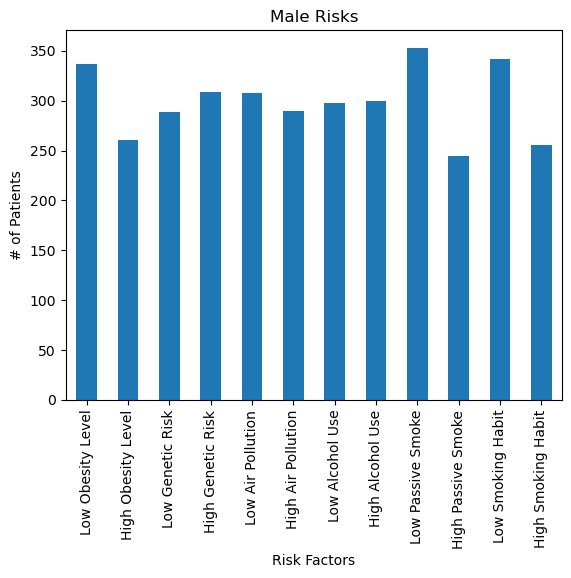

In [119]:
male_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Male Risks")
plt.show()

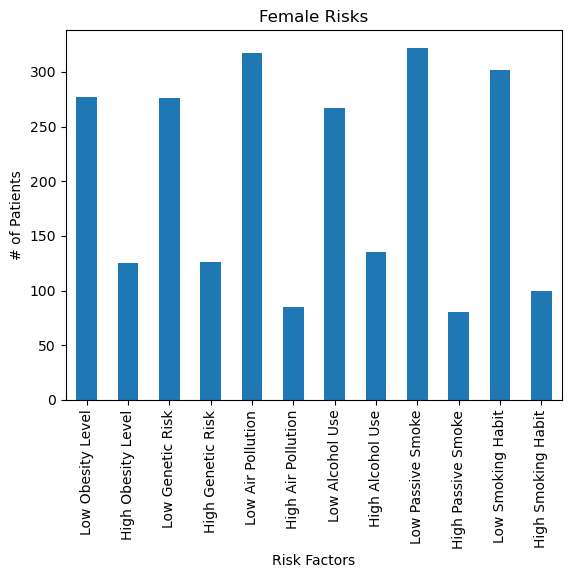

In [120]:
female_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Female Risks")
plt.show()

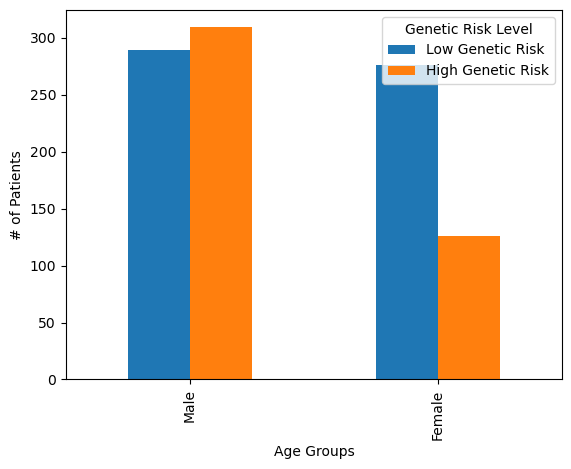

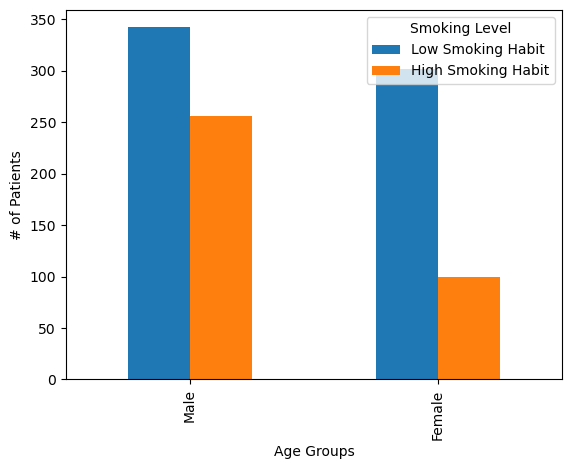

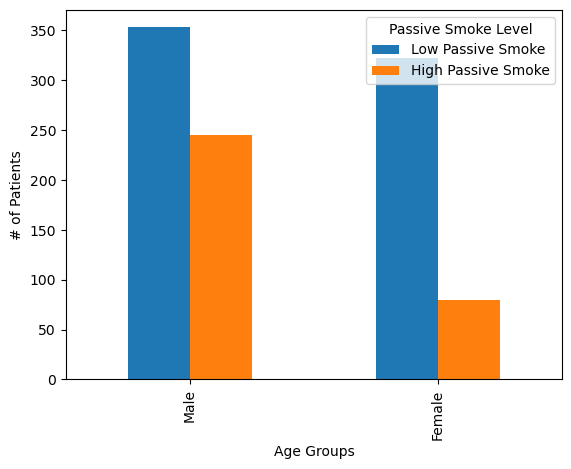

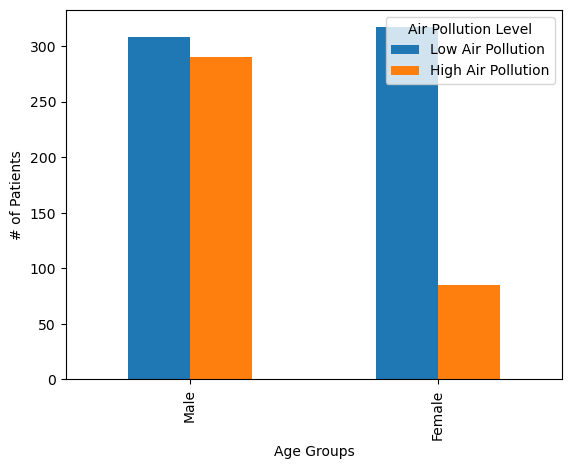

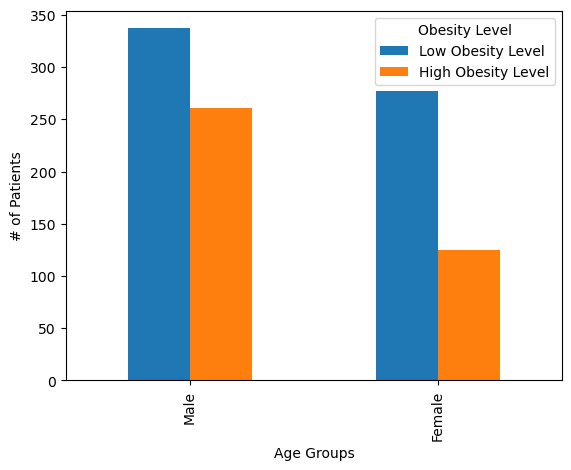

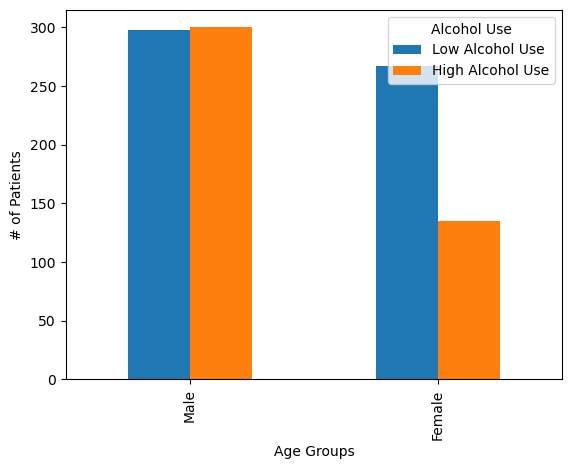

In [121]:
genetics_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
smoking_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
p_smoking_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
air_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
obesity_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
alcohol_gender.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")

plt.show()

In [129]:
#Find the average level of alcohol use, obseity, genetic risk, air pollution, passive smoke, and smoking for male and female groups
male_alcohol1 = male_group["Alcohol use"].mean()
female_alcohol1 = female_group["Alcohol use"].mean()
male_obesity1 = male_group["Obesity"].mean()
female_obesity1 = female_group["Obesity"].mean()
male_smoking1 = male_group["Smoking"].mean()
female_smoking1 = female_group["Smoking"].mean()
male_genetics1 = male_group["Genetic Risk"].mean()
female_genetics1 = female_group["Genetic Risk"].mean()
male_air1 = male_group["Air Pollution"].mean()
female_air1 = female_group["Air Pollution"].mean()
male_p_smoke1 = male_group["Passive Smoker"].mean()
female_p_smoke1 = female_group["Passive Smoker"].mean()


In [123]:
#create function to plot male vs female average risk factors

def plots (y_axis, y_label, title):
    x_axis = ["Male", "Female"]
    colors=["blue", "red"]
    plt.bar(x_axis, y_axis, color=colors)
    plt.ylabel(y_label)
    plt.xlabel("Gender")
    plt.title(title)
    plt.show()


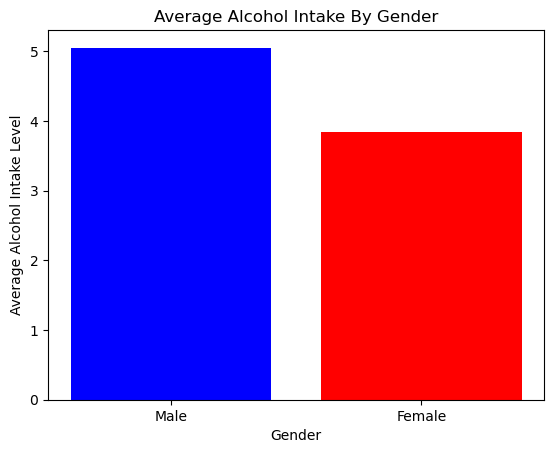

In [124]:
#plot averages for alcohol consumption
y = [male_alcohol1, female_alcohol1]
plots (y, "Average Alcohol Intake Level", "Average Alcohol Intake By Gender")

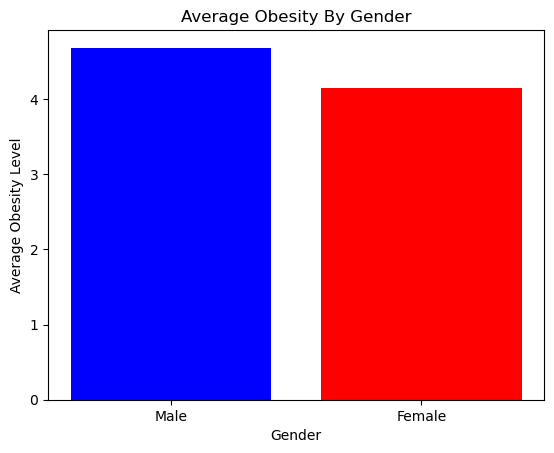

In [125]:
#plot obesity averages
y = [male_obesity1, female_obesity1]
plots (y, "Average Obesity Level", "Average Obesity By Gender")

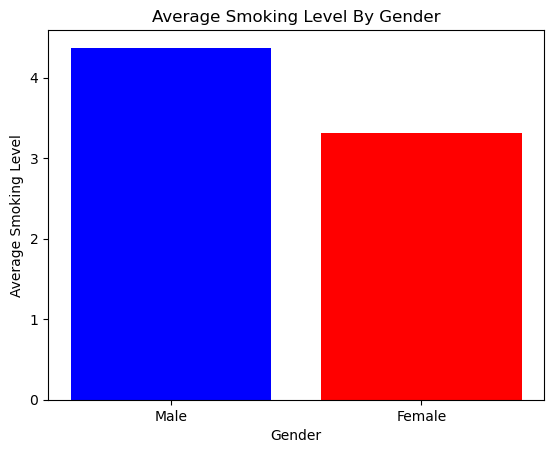

In [126]:
#plot smoking averages
y = [male_smoking1, female_smoking1]
plots (y, "Average Smoking Level", "Average Smoking Level By Gender")

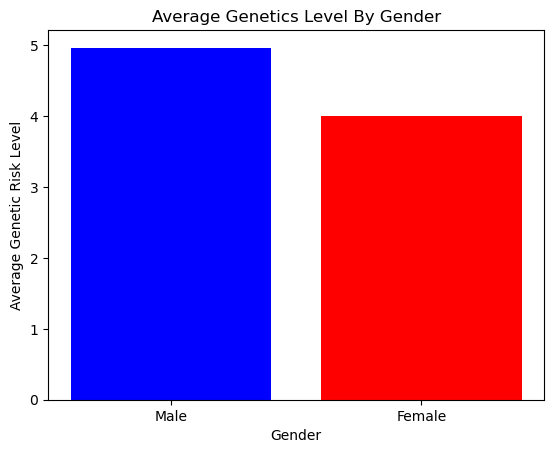

In [130]:
#plot genetic averages
y = [male_genetics1, female_genetics1]
plots (y, "Average Genetic Risk Level", "Average Genetics Level By Gender")

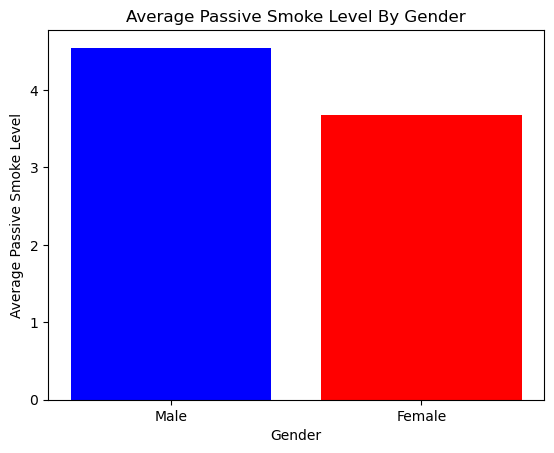

In [131]:
#plot passive smoking averages
y = [male_p_smoke1, female_p_smoke1]
plots (y, "Average Passive Smoke Level", "Average Passive Smoke Level By Gender")

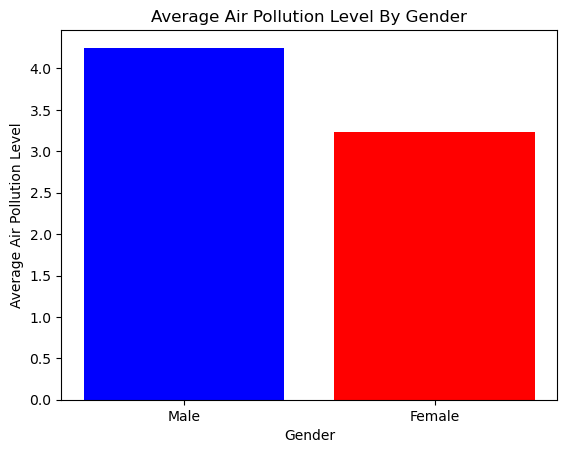

In [132]:
#plot air pollution averages
y = [male_air1, female_air1]
plots (y, "Average Air Pollution Level", "Average Air Pollution Level By Gender")

In [53]:
#get a data frame of level of cancer counts in male vs female
male_levels = male_group["Level"].value_counts()
female_levels = female_group["Level"].value_counts()
gender_data = {
    "Male": male_levels,
    "Female": female_levels}

gender_level_counts = pd.DataFrame(gender_data)
gender_level_counts

,Male,Female
Level,,
High,252,113
Low,149,154
Medium,197,135


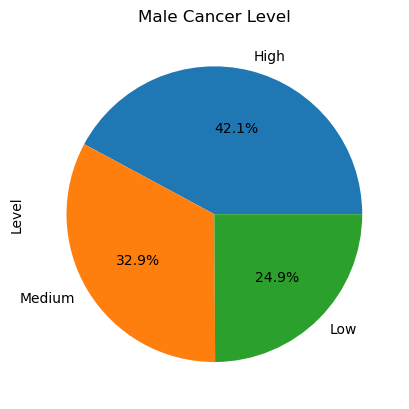

In [134]:
#create a pie chart for each gender to look a levels of cancer per gender
male_levels = male_group["Level"].value_counts()
pie_graph = male_levels.plot(kind="pie", y="Level", autopct='%1.1f%%', title = "Male Cancer Level")
pie_graph.set_ylabel("Level")
plt.show()

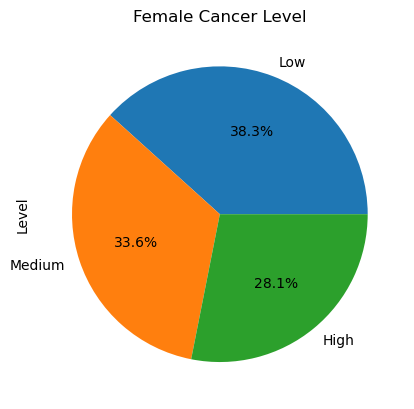

In [133]:
female_levels = female_group["Level"].value_counts()
pie_graph = female_levels.plot(kind="pie", y="Level", autopct='%1.1f%%', title="Female Cancer Level")
pie_graph.set_ylabel("Level")
plt.show()

Data Based on Age Groups

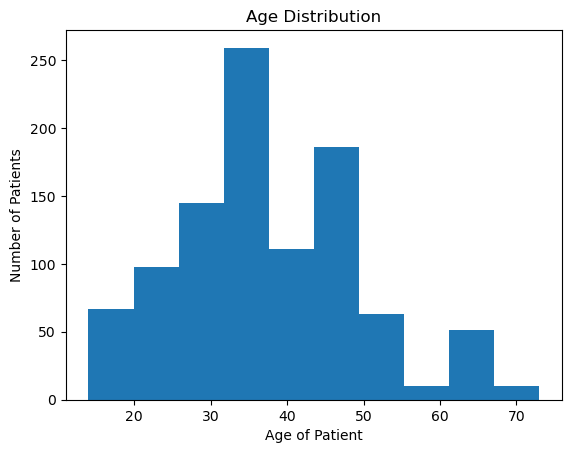

In [168]:
#histogram of age 
plt.hist(clean_cancer["Age"])
plt.xlabel("Age of Patient")
plt.ylabel("Number of Patients")
plt.title("Age Distribution")
plt.show()

In [18]:
#find the high, low, and middle of the age groups
print(clean_cancer["Age"].max())
print(clean_cancer["Age"].min())
print(clean_cancer["Age"].median())

73
14
36.0


In [54]:
#create bins 
age_bins = [14, 35, 55, 75]
age_labels = ["Young", "Middle Age", "Old"]

In [55]:
#use pd.cut to categorize age based on the bins
clean_cancer["Age Group"] = pd.cut(clean_cancer["Age"], 
                                age_bins, labels=age_labels, include_lowest=True)
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level,Smoking Level,Alcohol Use,Genetic Risk Level,Air Pollution Level,Obesity Level,Passive Smoke Level,Age Group
0,P1,33,Male,2,4,3,4,3,2,Low,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level,Low Passive Smoke,Young
1,P10,17,Male,3,1,4,2,2,4,Medium,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,Low Obesity Level,Low Passive Smoke,Young
2,P100,35,Male,4,5,5,7,2,3,High,Low Smoking Habit,Low Alcohol Use,Low Genetic Risk,Low Air Pollution,High Obesity Level,Low Passive Smoke,Young
3,P1000,37,Male,7,7,6,7,7,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level,High Passive Smoke,Middle Age
4,P101,46,Male,6,8,7,7,8,7,High,High Smoking Habit,High Alcohol Use,High Genetic Risk,High Air Pollution,High Obesity Level,High Passive Smoke,Middle Age


In [56]:
#create Age Group DFs
young_group = clean_cancer.loc[clean_cancer["Age Group"] == "Young"]
middle_group = clean_cancer.loc[clean_cancer["Age Group"]== "Middle Age"]
old_group = clean_cancer.loc[clean_cancer["Age Group"] == "Old"]

In [104]:
young_smoke = young_group["Smoking Level"].value_counts()
middle_smoke = middle_group["Smoking Level"].value_counts()
old_smoke = old_group["Smoking Level"].value_counts()

data = {
    'Young': young_smoke,
    'Middle': middle_smoke,
    'Old': old_smoke
}

smoking_habit_counts = pd.DataFrame(data)
smoking_habit_counts

,Young,Middle,Old
Smoking Level,,,
Low Smoking Habit,353,261,30
High Smoking Habit,144,171,41


In [105]:
young_p_smoke = young_group["Passive Smoke Level"].value_counts()
middle_p_smoke = middle_group["Passive Smoke Level"].value_counts()
old_p_smoke = old_group["Passive Smoke Level"].value_counts()

p_smoking_data = {
    'Young': young_p_smoke,
    'Middle': middle_p_smoke,
    'Old': old_p_smoke
}

p_smoking_habit_counts = pd.DataFrame(p_smoking_data)
p_smoking_habit_counts

,Young,Middle,Old
Passive Smoke Level,,,
Low Passive Smoke,353,272,50
High Passive Smoke,144,160,21


In [106]:
#make a data frame for air pollution
young_air = young_group["Air Pollution Level"].value_counts()
middle_air = middle_group["Air Pollution Level"].value_counts()
old_air = old_group["Air Pollution Level"].value_counts()

air_data = {
    'Young': young_air,
    'Middle': middle_air,
    'Old': old_air
}

air_age_counts = pd.DataFrame(air_data)
air_age_counts

,Young,Middle,Old
Air Pollution Level,,,
Low Air Pollution,344,251,30
High Air Pollution,153,181,41


In [107]:
#make a data frame for obesity
young_obesity = young_group["Obesity Level"].value_counts()
middle_obesity = middle_group["Obesity Level"].value_counts()
old_obesity = old_group["Obesity Level"].value_counts()

obesity_data = {
    'Young': young_obesity,
    'Middle': middle_obesity,
    'Old': old_obesity
}

obesity_age_counts = pd.DataFrame(obesity_data)
obesity_age_counts

,Young,Middle,Old
Obesity Level,,,
Low Obesity Level,315,248,51
High Obesity Level,182,184,20


In [108]:
#make a data frame for alcohol use
young_alcohol = young_group["Alcohol Use"].value_counts()
middle_alcohol = middle_group["Alcohol Use"].value_counts()
old_alcohol = old_group["Alcohol Use"].value_counts()

alcohol_data = {
    'Young': young_alcohol,
    'Middle': middle_alcohol,
    'Old': old_alcohol
}

alcohol_age_counts = pd.DataFrame(alcohol_data)
alcohol_age_counts

,Young,Middle,Old
Alcohol Use,,,
Low Alcohol Use,294,251,20
High Alcohol Use,203,181,51


In [109]:
#data frame for genetic risk
#make a data frame for alcohol use
young_genetics = young_group["Genetic Risk Level"].value_counts()
middle_genetics = middle_group["Genetic Risk Level"].value_counts()
old_genetics = old_group["Genetic Risk Level"].value_counts()

genetics_data = {
    'Young': young_genetics,
    'Middle': middle_genetics,
    'Old': old_genetics
}

genetics_counts = pd.DataFrame(genetics_data)
genetics_counts

,Young,Middle,Old
Genetic Risk Level,,,
Low Genetic Risk,294,251,20
High Genetic Risk,203,181,51


In [110]:
#transpose data so all indexes are on age groups

genetics_counts = genetics_counts.T
p_smoking_habit_counts = p_smoking_habit_counts.T
smoking_habit_counts = smoking_habit_counts.T
air_age_counts = air_age_counts.T
obesity_age_counts = obesity_age_counts.T
alcohol_age_counts = alcohol_age_counts.T
print(genetics_counts)
print(p_smoking_habit_counts)
print(smoking_habit_counts)
print(air_age_counts)
print(obesity_age_counts)
print(alcohol_age_counts)


Genetic Risk Level  Low Genetic Risk  High Genetic Risk
Young                            294                203
Middle                           251                181
Old                               20                 51
Passive Smoke Level  Low Passive Smoke  High Passive Smoke
Young                              353                 144
Middle                             272                 160
Old                                 50                  21
Smoking Level  Low Smoking Habit  High Smoking Habit
Young                        353                 144
Middle                       261                 171
Old                           30                  41
Air Pollution Level  Low Air Pollution  High Air Pollution
Young                              344                 153
Middle                             251                 181
Old                                 30                  41
Obesity Level  Low Obesity Level  High Obesity Level
Young                        315       

In [111]:
#merge the data frames together
merged_data = pd.merge(genetics_counts, smoking_habit_counts, left_index=True, right_index=True, how='inner')
merg1 = pd.merge(merged_data, air_age_counts, left_index=True, right_index=True, how="inner")
merg2 = pd.merge(merg1, obesity_age_counts, left_index=True, right_index=True, how="inner")
merg3 = pd.merge(merg2, alcohol_age_counts, left_index=True, right_index=True, how="inner")
merg4 = pd.merge(merg3, p_smoking_habit_counts, left_index=True, right_index=True, how="inner")
merg4

,Low Genetic Risk,High Genetic Risk,Low Smoking Habit,High Smoking Habit,Low Air Pollution,High Air Pollution,Low Obesity Level,High Obesity Level,Low Alcohol Use,High Alcohol Use,Low Passive Smoke,High Passive Smoke
Young,294,203,353,144,344,153,315,182,294,203,353,144
Middle,251,181,261,171,251,181,248,184,251,181,272,160
Old,20,51,30,41,30,41,51,20,20,51,50,21


In [112]:
young_all_risks = merg4.loc["Young"]
middle_all_risks = merg4.loc["Middle"]
old_all_risks = merg4.loc["Old"]

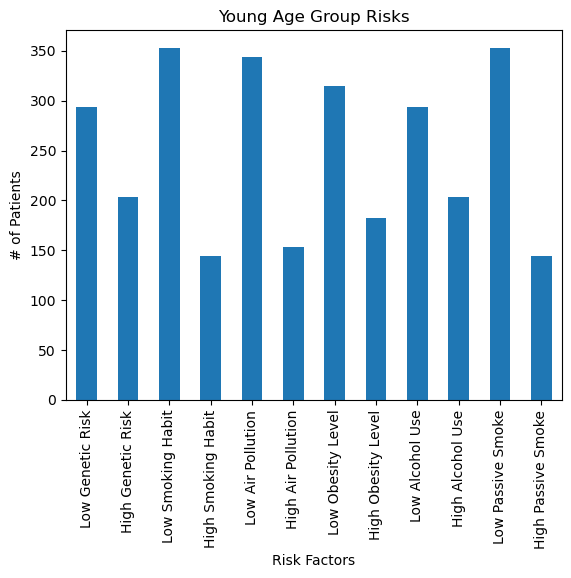

In [113]:
young_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Young Age Group Risks")
plt.show()

<Axes: title={'center': 'Middle Age Group Risks'}, xlabel='Risk Factors', ylabel='# of Patients'>

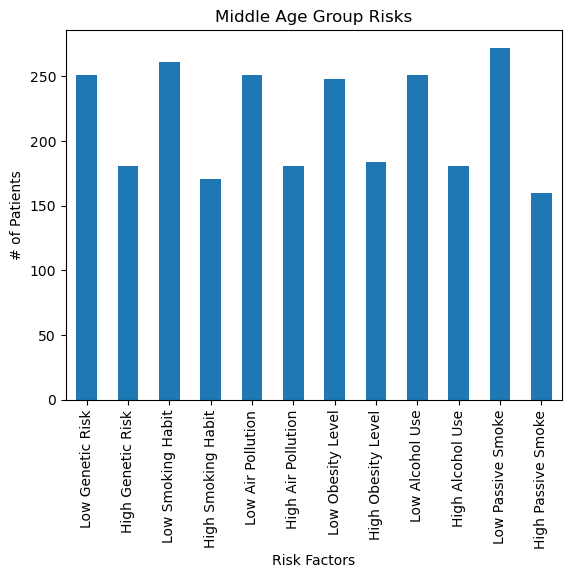

In [114]:
middle_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Middle Age Group Risks")

<Axes: title={'center': 'Old Age Group Risks'}, xlabel='Risk Factors', ylabel='# of Patients'>

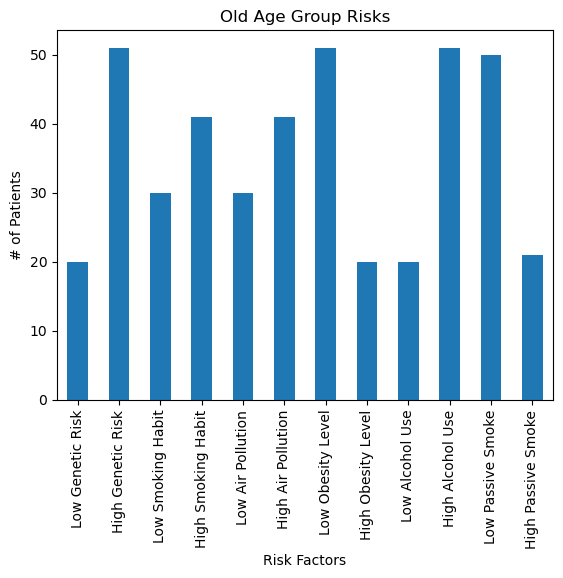

In [115]:
old_all_risks.plot(kind ="bar", xlabel="Risk Factors", ylabel="# of Patients", title="Old Age Group Risks")

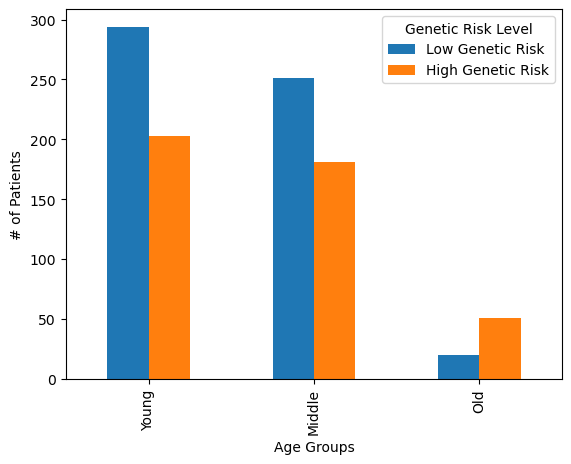

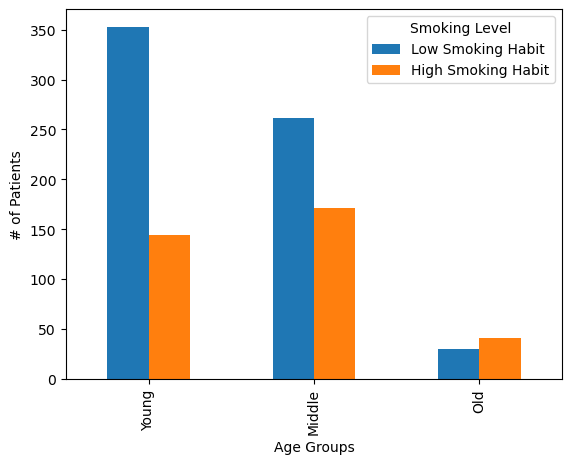

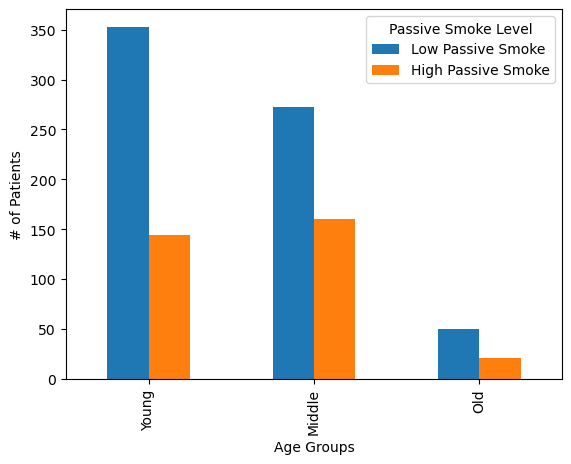

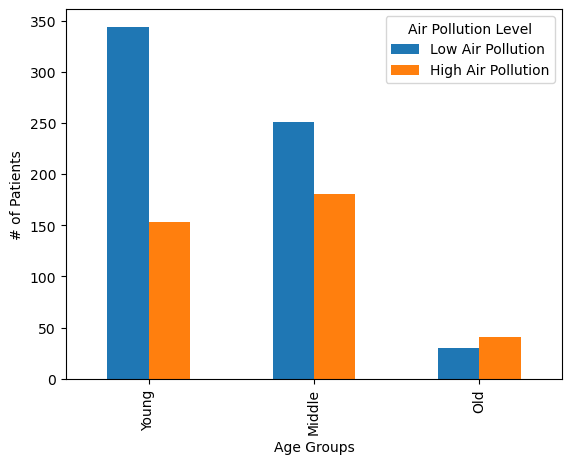

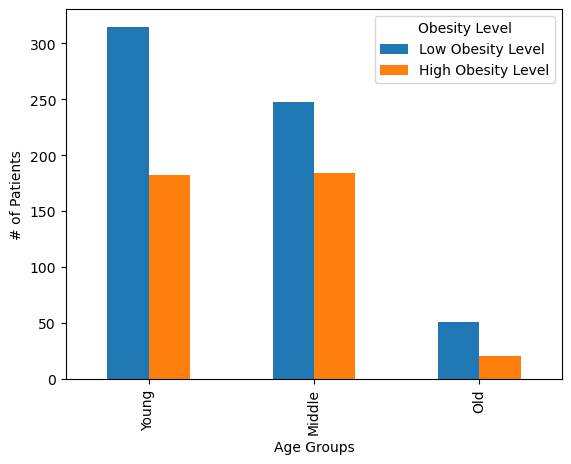

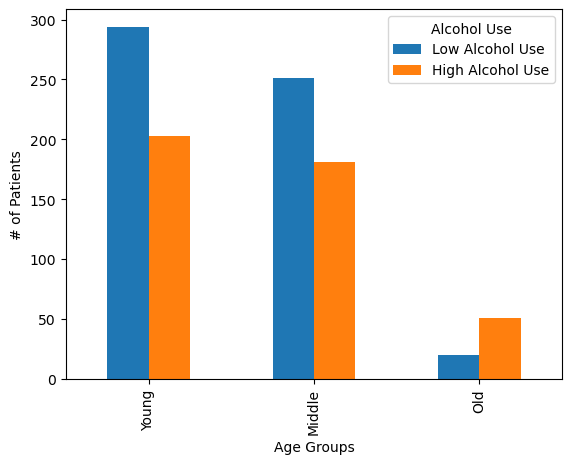

In [116]:
#make a bar graph showing all the different risk factos by age group
genetics_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
smoking_habit_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
p_smoking_habit_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
air_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
obesity_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")
alcohol_age_counts.plot(kind = "bar", xlabel="Age Groups", ylabel="# of Patients")

plt.show()

In [133]:
young_alcohol = young_group["Alcohol use"].mean()
middle_alcohol = middle_group["Alcohol use"].mean()
old_alcohol = old_group["Alcohol use"].mean()
young_obesity = young_group["Obesity"].mean()
middle_obesity = middle_group["Obesity"].mean()
old_obesity = old_group["Obesity"].mean()
young_smoking = young_group["Smoking"].mean()
middle_smoking = middle_group["Smoking"].mean()
old_smoking = old_group["Smoking"].mean()
young_p_smoke1 = young_group["Passive Smoker"].mean()
middle_p_smoke1 = middle_group["Passive Smoker"].mean()
old_p_smoke1 = old_group["Passive Smoker"].mean()
young_genetic = young_group["Genetic Risk"].mean()
middle_genetic = middle_group["Genetic Risk"].mean()
old_genetic = old_group["Genetic Risk"].mean()
young_air1 = young_group["Air Pollution"].mean()
middle_air1 = middle_group["Air Pollution"].mean()
old_air1 = old_group["Air Pollution"].mean()

In [134]:
def age_plots (y_axis, y_label, title):
    x_axis = ["Young", "Middle Age", "Old"]
    colors=["blue", "red", "yellow"]
    plt.bar(x_axis, y_axis, color=colors)
    plt.ylabel(y_label)
    plt.xlabel("Gender")
    plt.title(title)
    plt.show()

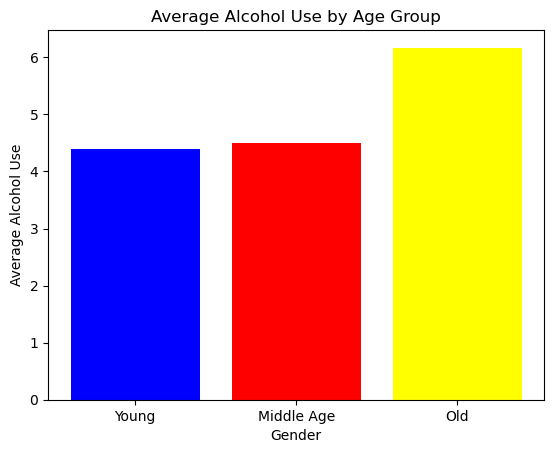

In [135]:
y = [young_alcohol, middle_alcohol, old_alcohol]

age_plots(y, "Average Alcohol Use", "Average Alcohol Use by Age Group")

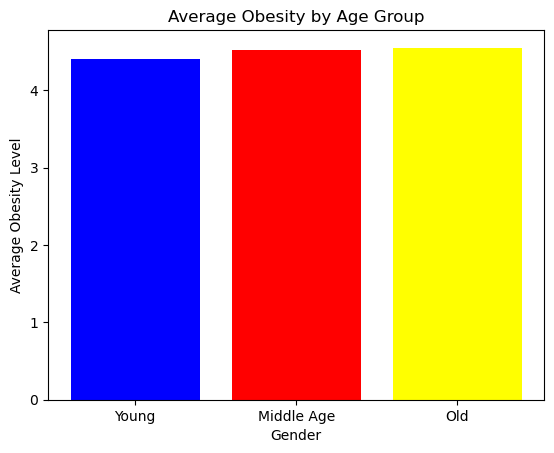

In [141]:
y_obesity = [young_obesity, middle_obesity, old_obesity]

age_plots(y_obesity, "Average Obesity Level", "Average Obesity by Age Group")

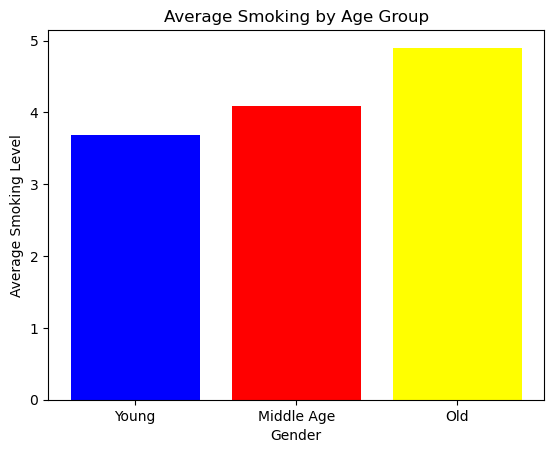

In [140]:
y_smoking = [young_smoking, middle_smoking, old_smoking]
age_plots(y_smoking, "Average Smoking Level", "Average Smoking by Age Group")

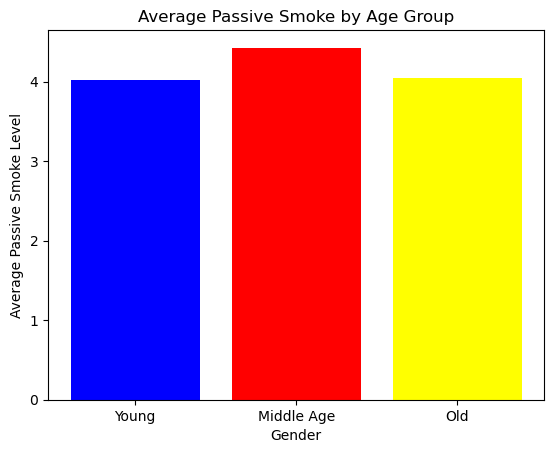

In [139]:
y_p_smoking = [young_p_smoke1, middle_p_smoke1, old_p_smoke1]
age_plots(y_p_smoking, "Average Passive Smoke Level", "Average Passive Smoke by Age Group")

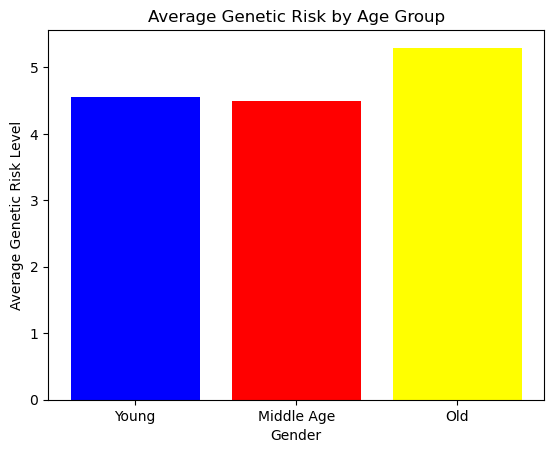

In [142]:
y_genetics = [young_genetic, middle_genetic, old_genetic]
age_plots(y_genetics, "Average Genetic Risk Level", "Average Genetic Risk by Age Group")

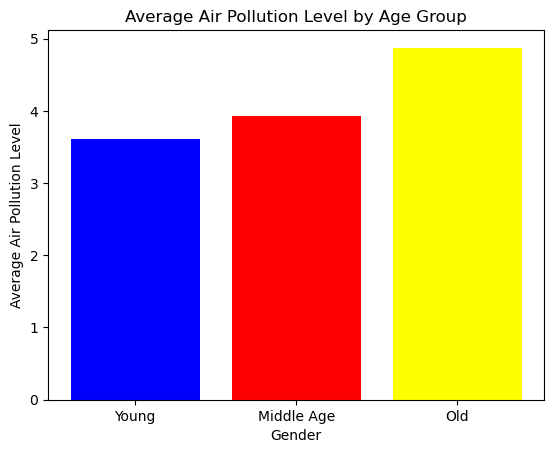

In [143]:
y_air = [young_air1, middle_air1, old_air1]
age_plots(y_air, "Average Air Pollution Level", "Average Air Pollution Level by Age Group")